In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
train = pd.read_csv("C:/Users/user/Desktop/Kaggle/1to9/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/Kaggle/1to9/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = train.drop(labels = ["label"],axis = "columns") 
y_train = train["label"]

In [5]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


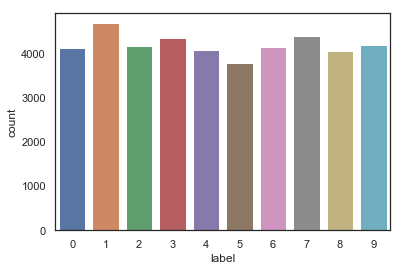

In [6]:
g = sns.countplot(y_train)

In [7]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
np.any(train.isnull())==True #No missing data

False

In [9]:
x_train = x_train.astype('float32')/255.0
test = test.astype('float32')/255.0

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
y_train = to_categorical(y_train, num_classes = 10)

In [13]:
y_train #y_train -> 虛擬變量

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)#, random_state=100)

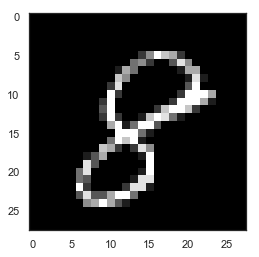

In [16]:
plt.imshow(x_train[0][:,:,0], cmap='gray')

In [18]:
classifier=Sequential()

In [19]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), padding="Same", activation="relu", input_shape=(28,28,1)))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), padding="Same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=2, padding="Same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(rate=0.4)) #prevent overfitting, rate = discarded input ratio

In [20]:
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(filters=64, kernel_size=(5,5), padding="Same", activation="relu"))
classifier.add(BatchNormalization())
#classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(rate=0.4)) #prevent overfitting, rate = discarded input ratio

In [21]:
classifier.add(Convolution2D(filters=128, kernel_size=(4,4), padding="Same", activation="relu"))
classifier.add(BatchNormalization())

In [22]:
classifier.add(Flatten())
#classifier.add(Dense(units=256, activation = "relu")) #隱藏層 Hidden layer
classifier.add(Dropout(0.4))
classifier.add(Dense(units=10, activation = "softmax")) #隱藏層 Hidden layer, units=10 because y=0,1,...,9

In [23]:
# Define optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [24]:
# Compile the model
#classifier.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
classifier.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range = 0.15,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 15)

In [26]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [27]:
batch_size=64
history =classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 60, validation_data = (x_val,y_val),
                              steps_per_epoch=500,
                              verbose = 2, callbacks=[annealer])

Epoch 1/60
 - 505s - loss: 0.5291 - acc: 0.8425 - val_loss: 0.1421 - val_acc: 0.9650
Epoch 2/60
 - 516s - loss: 0.1618 - acc: 0.9528 - val_loss: 0.0649 - val_acc: 0.9838
Epoch 3/60
 - 511s - loss: 0.1126 - acc: 0.9657 - val_loss: 0.0485 - val_acc: 0.9879
Epoch 4/60
 - 495s - loss: 0.0977 - acc: 0.9710 - val_loss: 0.0568 - val_acc: 0.9829
Epoch 5/60
 - 515s - loss: 0.0832 - acc: 0.9752 - val_loss: 0.0412 - val_acc: 0.9888
Epoch 6/60
 - 525s - loss: 0.0797 - acc: 0.9771 - val_loss: 0.0503 - val_acc: 0.9845
Epoch 7/60
 - 470s - loss: 0.0672 - acc: 0.9792 - val_loss: 0.0307 - val_acc: 0.9907
Epoch 8/60
 - 471s - loss: 0.0624 - acc: 0.9821 - val_loss: 0.0245 - val_acc: 0.9931
Epoch 9/60
 - 463s - loss: 0.0594 - acc: 0.9822 - val_loss: 0.0318 - val_acc: 0.9921
Epoch 10/60
 - 453s - loss: 0.0559 - acc: 0.9829 - val_loss: 0.0317 - val_acc: 0.9921
Epoch 11/60
 - 418s - loss: 0.0563 - acc: 0.9831 - val_loss: 0.0322 - val_acc: 0.9893
Epoch 12/60
 - 415s - loss: 0.0491 - acc: 0.9856 - val_loss: 0.

In [28]:
1+2

3

In [29]:
results = classifier.predict(test)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [30]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

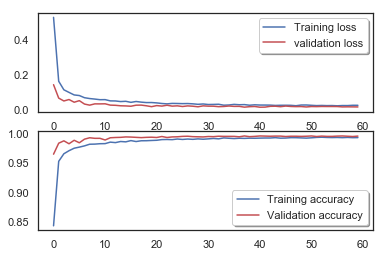

In [33]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

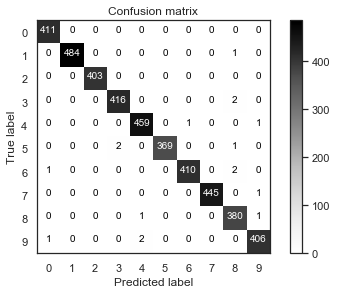

In [50]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = classifier.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

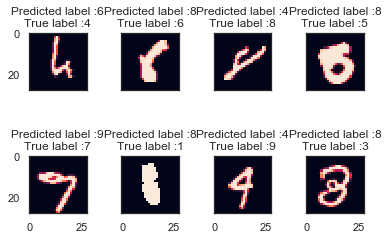

In [82]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 4
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.6, hspace =0.3)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-8:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [83]:
from keras.models import load_model

In [99]:
#save
result12= classifier.predict(test[0:5])
result12 = np.argmax(result12,axis = 1)
result12 = pd.Series(result12,name="Label")
print(result12)

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64


In [100]:
classifier.save("Mnist_predictor.h5")